# Lesson 6.1 Scikit-Learn快速入门

“工欲善其事，必先利其器”
——————《论语》

In [3]:
# 科学计算模块
import numpy as np
import pandas as pd

# 画图模块
import matplotlib.pyplot as plt

# 机器学习模块
from ML_basic_function import *

在此前的算法学习过程中，我们都是先从机器学习的算法理论出发，然后通过手动编程的方式来进行算法的建模实践。这其实是一种重内力大于重招式的学习方法，在理论+手动实现的学习过程中，我们不仅通过原理的手动实现深化了对基础原理的理解，同时也一定程度锻炼了代码实现能力，而这些其实都是一名算法工程师的基本功。

不过，伴随着算法难度逐渐加深，"原理+手动实现“的学习方式将逐渐变得不太适用，至少对初学者来说，面对复杂算法学习时，“原理+手动实现“的学习方式并不高效。对于定位在利用算法解决问题的算法工程岗位来说，整体的技能要求其实是内功和招式并重的。也就是说，我们不仅需要通晓算法原理以及具备一定的编程能力，同时也需要掌握一些能够比手动编写算法更高效的执行机器学习建模的工具，也就是掌握一些算法包或者算法库工具。

所谓算法库或者算法包，其实就是指封装了一系列可以执行机器学习算法建模相关功能的函数和类的程序模块，其功能调用方法和此前我们自定义的ML_basic_.function.py文件类似。当然，对于不同的编程语言和运行环境，其实有对应不同的算法库或算法包，例如在语言中，就有数以万计的针对不同算法的一个个独立的算法包，比较有名的诸如提供分类模型建模功能支持的rat包、提供聚类算法建模功能的cluster包等等。尽管这些分门别类的包在每一项（类）具体算法建模过程中都能提供非常专业的功能支持，但由于这些算法包是由不同的团队/个人来进行的开发和维护，包的使用方法和维护相同都各不相同，这就使得一个使用语言的算法工作者在日常工作中至少需要和几十个算法包打交道，并且由于各个包相对独立，使得算法工作者需要时刻关注各包的更新情况及兼容方法（如果需要的话），这些都在无形之中对使用语言进行机器学习建模造成了一定的阻碍。

虽然Python也是开源语言，但或许是吸取了R语言的前车之鉴(Python比R诞生更晚)，也或许是拥有了更完整的科学计算库SciPy,Pytho数据科学的一些核心功能都由一些更加统一和规范的第三方库来提供，例如科学计算库NumPy、.表格数据分析包Pandas,以及机器学习算法库Scikit-Learn。

---

> 算法包、算法库、算法框架概念辨析：

很多时候我们在使用这三个概念的时候并不会特别在意三者的区别，或者说大多数时候这三者概念的区别并不会影响我们实际对不同的程序模块的称呼，例如我们会称呼sklearn为一个算法库，要使用xgboost时候需要安装一个对应的算法包，而类似PyTorch、TensorFlow这种能够执行深度学习运算的模块，我们则会称其为算法框架。

但其实三者其实还是略有区别，对于算法包来说，可能只是包含了支持单独一个或一类算法使用的类或函数；而算法库则指代封装程度更高、对机器学习这一大类算法功能实现更加完整、甚至是定义了一类数据结构的代码模块；当然，如果是算法框架，则会在算法库的基础上，更进一步定义基本对象类型的运行方式。

---

## 一、Scikit-Learn的前世今生

* Scikit-Learn项目简介

Scikit-Learn最早是由David Cournapeau等人在2007年谷歌编程之夏(Google Summer of Code)活动中发起的一个项目，并与2010年正式开源，目前归属NRA（法国国家信息与自动化研究所）。而项目取名为Scikit-Learn,也是因为该算法库是基于SciPy:来进行的构建，而Scikit!则是SciPy Kit(SciPy衍生的工具套件）的简称，而learn，则不禁让人联系到机器学习Machine Learning。因此，尽管Scikit-Lean看起来不如NumPy、Pandas短小精悍，但其背后的实际含义也是一目了然。

经过数十年的发展，Scikit-Lean已经成为目前机器学习领域最完整、同时也是最具影响力的算法库，更重要的是，该项目拥有较为充裕的资金支持和完整规范的运作流程，以及业内顶级的开发和维护团队，目前以三个月一个小版本的速度在进行更新迭代。

## 二、Scikit-Learn官网使用指南与核心功能介绍

接下来，我们围绕Scikit-Learn官网的基本架构与核心功能进行介绍，并同时介绍关于Scikit-Learn的基本安装与使用方法。进入Scikit-Learn官网，首先看到的是功能导航栏、Scikit-learn基本情况介绍以及几个核心功能跳转链接。

![Alt text](image-97.png)

关于核心信息部分，我们能够看到Scikit--Learnf作为开源项目的基本申明，以及该开源项目所遵循的BSD协议。当然比较重要的一点是，sklearn是构建在NumPy、SciPy和matplotlib.上的相关申明，后面我们会看到，sklearn中核心能够处理的对象类型就是NumPy当中的数组(array),同时sklearn中的诸多数学计算过程也都是基于SciPy中的相关功能来进行的实现。

> 值得注意的是，底层数据结构对算法库的影响是至关重要的，在分布式计算框架Spark中，算法库就有两类，其一是围绕Spark基本数据结构RDD构建的ML包，其二则是围绕Spark高级数据结构DataSet和DataFrame构建的MLLib包。当然由于基于更高级的数据结构所构建的算法模型更易于使用，因此ML包已经不再更新了。

In [4]:
import sklearn
sklearn.__version__

'1.4.0'

## 三、Scikit-Learn核心概念与快速使用方法

作为功能完整算法库，sklearn不仅提供了完整的机器学习建模功能支持，同时也提供了包括数据预处理、模型评估、模型选择等诸多功能，并且支持以Pipelines（管道）形式构建机器学习流，而基于Pipeline和模型选择功能甚至能够衍化出AutoML（自动机器学习）的相关功能，也就是现在所谓的Auto-sklearn。

不过在开始阶段，我们还是需要从skea的基础功能入手进行学习，然后循序渐进、逐步深化对工具的理解和掌握。

* sklearn核心对象类型：评估器(estimator)

很多功能完整的第三方库其实都有各自定义的核心对象类型，如NumPy中的数组(Array)、Pandas中的DataFrame、以及PyTorch中的张量(tensor)等，当然这些由第三方库定义的数据结构实际上都是定义在源码中的某个类，在调用这些对象类型时实际上都是在实例化对应的类。而对于sklearn来说，定义的核心对象类型就是评估器。我们可以将评估器就理解成一个个机器学习模型，而sklearn的建模过程最核心的步骤就是围绕着评估器进行模型的训练。

同样，围绕评估器的使用也基本分为两步，其一是实例化该对象，其二则是围绕某数据进行模型训练。接下来，我们就尝试调用sklearn中的线性回归评估器（模型）来进行线性回归建模实验。

首先是准备数据，我们还是以此前定义的、基本规律满足$y=2x1-x2+1$分布回归类数据集：

In [5]:
# 设置随机数种子
np.random.seed(24)

# 扰动项取值为0.01
features, labels = arrayGenReg(delta=0.01)

In [6]:
# 查看数据集
features

array([[ 1.32921217, -0.77003345,  1.        ],
       [-0.31628036, -0.99081039,  1.        ],
       [-1.07081626, -1.43871328,  1.        ],
       ...,
       [ 1.5507578 , -0.35986144,  1.        ],
       [-1.36267161, -0.61353562,  1.        ],
       [-1.44029131,  0.50439425,  1.        ]])

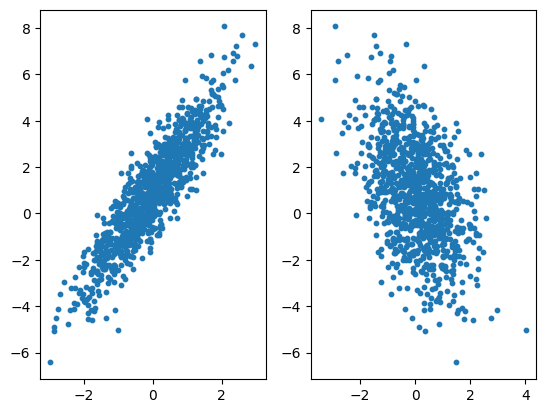

In [7]:
# 可视化数据集
plt.subplot(1, 2, 1)
plt.scatter(features[:, 0], labels, s=10)
plt.subplot(1, 2, 2)
plt.scatter(features[:, 1], labels, s=10)


然后，尝试调用sklearn中的线性回归评估器，这里需要知道的是，sklearn其实是分模块存储不同评估器的类或者常用函数的，比如sklearn中的线性回归评估器LinearRegression实际上是在sklearn包中的linear_.model模块下，因此调用该评估器其实会有以下三种方法：

In [19]:
# 方法一：直接导入sklearn
import sklearn.linear_model
# 然后在sklearn里面的linear_model模块中调用LinearRegression
sklearn.linear_model.LinearRegression

sklearn.linear_model._base.LinearRegression

In [17]:
# 方法二：直接导入sklearn的linear_model模块
from sklearn import linear_model
# 然后在linear_model模块中调用LinearRegression
linear_model.LinearRegression

sklearn.linear_model._base.LinearRegression

In [18]:
# 方法三：直接导入sklearn的linear_model模块中的LinearRegression
from sklearn.linear_model import LinearRegression

默认情况下，我们采用第三种方法导入评估器。

需要知道的是，导入评估器实际上就相当于是导入了某个模块（实际上是某个类），但要使用这个评估器类，还需要对其进行实例化操作才能进行后续的使用，类的实例化过程会有可选参数的输入，当然也可以不输入任何参数直接实例化该类的对象：

In [20]:
model = LinearRegression()

注意，此时model就是LinearRegression类的一个实例化对象，而这个model对象，其实就是一个线性回归模型。当然，刚被实例化后的模型实际上还是一个未被训练的模型，即此时的ode其实是一个包含了若干个（暂时不确定）参数、并且参数取值待定的模型。接下来，我们需要输入上述数据对该模型进行训练。需要注意的是，此时我们无需在输入的特征矩阵中加入一列全都是1的列：

In [21]:
X = features[:, :2]     # 取前两个特征
y = labels              # 取标签

In [22]:
# 调用评估器中的fit方法来训练模型
model.fit(X, y)

LinearRegression()

fit方法是LinearRegression类中的一个至关重要的方法，同时也是sklearn中代表模型的评估器都具有的方法，当fit方法执行完后，即完成了模型训练，此时mode就相当于一个参数个数、参数取值确定的线性方程。而这些包括参数取值在内的所有模型信息，我们都可以通过调用mode对象当中的一些属性来查看，例如：

In [23]:
# 查看模型的参数
model.coef_, model.intercept_

(array([[ 1.99961892, -0.99985281]]), array([0.99970541]))

至此，我们就完成了模型训练过程。这里需要特别强调的是，sklearr默认接收的对象类型是数组，即无论是特征矩阵还是标签数组，最好都先转化成array对象类型再进行输入。此外，sklearn还能够处理array-like的数据，例如和数组形式相同的列表，但并不建议这么做。同时，在sklearn中，我们往往以称特征矩阵为Features Matrix,称特征数组为Target Vector,并且以$n_{samples}$表示数据行数、$n_{features}$表示特征矩阵列数：

![Alt text](image-98.png)

当然我们也可以对比最小二乘法的手动计算结果：

In [25]:
np.linalg.lstsq(features, labels, rcond=None)[0]

array([[ 1.99961892],
       [-0.99985281],
       [ 0.99970541]])

接下来，我们还可以利用该模型进行数值预测，我们就将模型应用于训练数据进行预测，可以使用model中的predict方法进行预测，同样，该方法也是sklearn中所有评估器类的一个方法：

In [26]:
model.predict(X)[:10]

array([[ 4.42754333],
       [ 1.35792976],
       [ 0.29698247],
       [ 1.83264567],
       [-2.47201615],
       [ 0.46806169],
       [ 2.8184199 ],
       [-0.81254525],
       [ 2.84841913],
       [ 0.81582296]])

In [27]:
y[:10]

array([[ 4.43811826],
       [ 1.375912  ],
       [ 0.30286597],
       [ 1.81970897],
       [-2.47783626],
       [ 0.47374318],
       [ 2.83085905],
       [-0.83695165],
       [ 2.84344069],
       [ 0.8176895 ]])

通过对比，我们不难发现发现，模型整体预测效果较好。当然，在借助sklean进行建模的时候，我们也可以借助sklearn提供的模型评估函数来进行模型最终效果的评估，而这些实用函数，就是sklearn算法库中第二类重要的对象类型。

* sklearn中的实用函数

接下来，我们尝试调用sklearn中的MSE计算函数，对上述建模结果进行模型评估。值得注意的是，这些调用的对象不再是评估器（类），而是一个个单独的函数。函数的调用过程不需要进行实例化，直接导入相关模块即可：

In [28]:
# 在metrics模中导入MSE计算函数
from sklearn.metrics import mean_squared_error

In [29]:
# 输入真实值和预测值，计算MSE
mean_squared_error(y, model.predict(X))

9.300731379745628e-05

In [30]:
l = model.coef_.flatten().tolist() 
l.extend(model.intercept_.tolist())
l

[1.9996189241115243, -0.9998528065894626, 0.9997054101551712]

In [31]:
w = np.array(l).reshape(-1, 1)
w

array([[ 1.99961892],
       [-0.99985281],
       [ 0.99970541]])

In [34]:
# 对比手动计算的MSE计算结果
MSE(features, w, labels)

9.300731379745628e-05

至此，我们即完成了调用sklearn进行建模的简单流程，当然，在更进一步加入数据预处理、数据集切分以及模型结果验证等步骤之前，我们需要讨论几个至关重要的影响模型建模过程的核心问题：

* 模型实例化与超参数设置

上述调用sklearr进行的机器学习建模，不仅代码简单、而且过程也非常清晰，这些其实全都得益于Scikit--Learn对各评估器都设置了较为普适的初始默认参数所导致。我们知道，每个模型的构建过程其实都会涉及非常多的参数和超参数，参数的训练过程稍后讨论，此处先讨论关于sklearn中模型超参数的设置方法。

所谓超参数，指的是无法通过数学过程进行最优值求解、但却能够很大程度上影响模型形式和建模结果的因素，例如线性回归中，方程中自变量系数和截距项的取值是通过最小二乘法或者梯度下降算法求出的最优解，而例如是否带入带入截距项、是否对数据进行归一化等，这些因素同样会影响模型形态和建模结果，但却是“人工判断”然后做出决定的选项，而这些就是所谓的超参数。而sklearn中，对每个评估器进行超参数设置的时机就在评估器类实例化的过程中。首先我们可以查看LinearRegression评估器的相关说明，其中Parameters部分就是当前模型超参数的相关说明：

值得注意，超参数的设置方法和参数不同，一个模型的参数形式基本根据模型的计算规则就能确定，而一个模型包含几个超参数，其实是因模型而异、因工具而异的，例如，对于sklearr来说，我们可以通过n_jobs来设置参与计算的CPU核数，而在Spark中则是通过配置文件中的配置选项来分配每个任务的计算资源，不需要在算法执行过程中设置该超参数。但无论如何，sklearn中的超参数设计一定是一整套最符合sklearn设计理念以及模型运行方式的超参数，我们在实例化模型的过程中必须谨慎的选择模型超参数，以达到最终模型训练的预期。不过sklearn非常人性化的一点是，尽管大多数模型多有非常多的超参数（线性回归除外），但sklearn都对其设置了一套非常普适的默认值，从而使得在很多场景下，在无需特别关注的一些超参数的取值上，我们都能够直接使用默认值带入进行建模。

> 其实，我们还可以给出超参数的一个更加“广义“的定义：只要是影响模型建模过程的因素都是超参数，例如选取哪种优化方法、甚至是选取哪种算法进行建模，如果需要，我们都可以将其视作超参数，而不仅限于评估器中给出的这些。当然，如果要围绕这些超参数进行探讨，则需要更多的理论判别依据与实现工具。不过就模型选择来说，其实已经有一些框架能够实现模型的自动选择（不仅是模型自动调参，而是自动对比模型性能进而进行模型选择）

> 不过尽管在定义上，参数与超参数是严格不同的，但很多场景下我们也不会对其进行严格区分，比如在实例化评估器的过程中，我们也更多的称其为“进行参数设置”。

> 需要注意的是，此处线性方程中的normalize:并不是此前介绍的归一化方法，而是一种用每一行数据除以每一行数据的1范数或者2范数的方法，这种方法会在稍后进行介绍。

此外，我们还能够在类的说明中查阅关于模型对象在训练完后的相关属性，注意，这些属性只有当模型训练完毕后才能调用查看，对于线性方程来说，模型训练后可查看如下属性：

![Alt text](image-99.png)

* 训练过程使用的参数求解方法

根据此前的讨论，我们知道，实现线性回归参数计算的方法有很多种，我们可以通过最小二乘法进行一步到位的参数求解，同时也能够通过梯度下降进行迭代求解，而sklearn是采用哪种方式进行求解的呢？需要知道的是，这个问题其实至关重要，它不仅影响了sklearn中该算法的执行计算效率，同时也决定了该算法的很多建模特性，例如，如果是采用最小二乘法进行的参数求解，则面临特征矩阵拥有多重共线性时，计算结果将变得不再可靠。而我们对任何一个算法工具的掌握，都不能仅仅停留在“能够跑出结果”这个层面。

要详细了解训练过程的参数求解方法，就需要回到官网中查阅评估器的相关说明。而LinearRegression评估器的相关说明，在sklearn官网说明的六大板块（稍后会进行详细介绍）中的Regression板块中。

![Alt text](image-100.png)

在该模块的1.1.1.Ordinary Least Squares中，就是关于LinearRegression评估器的相关说明。从标题就能看出，sklearn中是通过普通最小二乘法来执行的线性方程参数求解。接下来详细介绍关于sklearn中算法解释部分的内容排布。首先，对于任何一个评估器（算法模型），说明文档会先介绍算法的基础原理、算法公式（往往就是损失函数计算表达式）以及一个简单的例子，必要时还会补充算法提出的相关论文链接，带领用户快速入门。

![Alt text](image-102.png)

紧接着，说明文档会对算法的某些特性进行探讨（往往都是在使用过程中需要注意的问题），例如对于普通最小二乘法，最大的问题还是在于特征矩阵出现严重多重共线性时，预测结果会出现较大的误差。然后，说明文档会例举一个该算法的完整使用过程，也就是穿插在说明文档中的example.。再然后，说明文档会讨论几个在模型使用过程中经常会比较关注的点，对于线性回归，此处列举了两个常见问题，其一是非负最小二乘如何实现，以及最小二乘法的计算复杂度。

![Alt text](image-103.png)

## 二、Scikit-Learn内容分布与查找

* sklearn的六大功能模块

首先，从建模功能上进行区分，sklearn将所有的评估器和函数功能分为六大类，分别是分类模型(Classification)、回归模型(Regression)、聚类模型(Clustering)、降维方法（Dimensionality reduction)、模型选择(Model selection)和数据预处理六大类。

![Alt text](image-104.png)

其中分类模型、回归模型和聚类模型是机器学习内主流的三大类模型，其功能实现主要依靠评估器类，并且前两者是有监督学习、聚类模型属于无监督学习范畴。当然，sklearn中并未包含关联规则相关算法，如Apriori或者FP-Growth,这其实一定程度上和sklearn只能处理array-ike类型对象有关。而后三者，降维方法、模型选择方法和数据预处理方法，则多为辅助建模的相关方法，并且既有评估器也有实用函数。

值得一提的是，上述六个功能模块的划分其实是存在很多交叉的，对于很多模型来说，既能处理分类问题、同时也能处理回归问题，而很多聚类算法同时也可以作为降维方法实用。不过这并不妨碍我们从这些功能入口出发，去寻找我们需要的评估器或实用函数。例如线性回归对用评估器可从Regression进入进行查找，而对用模型评估指标，由于评估指标最终是指导进行模型选择的，因此模型评估指标计算的实用函数的查找应该从Model selection,入口进入，并且在3.3 Metrics and scoring:quantifying the quality of predictions内。

* User Guide:sklearn所有内容的合集文档

此外，我们可以在最上方的User Guide一栏进入sklearn,所有内容的合集页面，其中包含了sklearn的所有内容按照使用顺序进行的排序。如果点击左上方的Other versions,则可以下载sklearn)所有版本的User Guide的PDF版本。

![Alt text](image-105.png)

* API:按照二级模块首字母排序的接口查询文档

如果想根据评估器或实用函数的名字去查找相关API说明文档，则可以点击最上方的API一栏进入到根据二极模块首字母排序的APl查询文档中。其中二级模块指的是类似包含线性回归的linear_.model模块或者包含MSE的metrics模块。

* 关于源码的阅读

阅读开源算法框架的源码，其实是很多高阶算法工程师自我提升的必经之路。尽管sklearn中出于代码运行速度考虑，有部分算法是用cytho重写了，但目前大多数代码都在朝着代码可读性和易用性方向发展（降低协作门槛），因此大部分模块的代码还是相对不难读懂的。

不过在初中级阶段、尤其是以调用评估器建模为主的情况下，还是应以熟练掌握常用评估器和实用函数、以及其背后的实现原理为核心进行学习。因此对大多数小伙伴来说，并不推荐在当前阶段并不推荐进行源码阅读。

以上就是关于sklearn官网的整体内容布局介绍，接下来，我们将继续围绕调库建模这一目标，进一步探索与尝试使用更多的sklearn中的相关功能。